### This notebook is to try out the different combinations of pre-processing steps and determine which steps we should take.

In [1]:
import pandas as pd
import seaborn as sns
from pprint import pprint

In [2]:
# Read the Json data file
recipes = pd.read_json('Epicurious Recipes/full_format_recipes.json')

In [3]:
recipes.head(10)

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
0,426.0,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",2006-09-01 04:00:00,None,"[1. Place the stock, lentils, celery, carrot, ...",7.0,"[4 cups low-sodium vegetable or chicken stock,...",30.0,2.500,559.0,"Lentil, Apple, and Turkey Wrap"
1,403.0,"[Food Processor, Onion, Pork, Bake, Bastille D...",2004-08-20 04:00:00,This uses the same ingredients found in boudin...,[Combine first 9 ingredients in heavy medium s...,23.0,"[1 1/2 cups whipping cream, 2 medium onions, c...",18.0,4.375,1439.0,Boudin Blanc Terrine with Red Onion Confit
2,165.0,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",2004-08-20 04:00:00,None,[In a large heavy saucepan cook diced fennel a...,7.0,"[1 fennel bulb (sometimes called anise), stalk...",6.0,3.750,165.0,Potato and Fennel Soup Hodge
3,NaN,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",2009-03-27 04:00:00,The Sicilian-style tomato sauce has tons of Me...,[Heat oil in heavy large skillet over medium-h...,NaN,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN,5.000,NaN,Mahi-Mahi in Tomato Olive Sauce
4,547.0,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",2004-08-20 04:00:00,None,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,"[1 12-ounce package frozen spinach soufflé, th...",20.0,3.125,452.0,Spinach Noodle Casserole
5,948.0,"[Sandwich, Food Processor, Tomato, Kid-Friendl...",2004-08-20 04:00:00,This recipe can be prepared in 45 minutes or l...,"[Mix basil, mayonnaise and butter in processor...",79.0,[2 1/2 cups (lightly packed) fresh basil leave...,19.0,4.375,1042.0,The Best Blts
6,NaN,"[Salad, Potato, Side, Easter, Low Fat, Quick &...",2004-08-20 04:00:00,Serve this newfangled main-course salad with a...,[Cook potatoes and carrots in large pot of boi...,NaN,"[1 1/2 pounds small red-skinned potatoes, each...",NaN,4.375,NaN,Ham and Spring Vegetable Salad with Shallot Vi...
7,NaN,"[Egg, Fruit, No-Cook, Cocktail Party, Vegetari...",2004-08-20 04:00:00,Pop one of these in your mouth for a burst of ...,[Stir together sugar and chili powder. Whisk e...,NaN,"[6 tablespoons granulated sugar, 1 1/2 tablesp...",NaN,3.750,NaN,Spicy-Sweet Kumquats
8,170.0,"[Beef, Ginger, Sauté, Stir-Fry, Quick & Easy, ...",2004-08-20 04:00:00,Bulgogi,"[Stir together soy sauce, sugar, sesame oil, w...",10.0,"[1/4 cup soy sauce, 1 tablespoon sugar, 2 teas...",7.0,4.375,1272.0,Korean Marinated Beef
9,602.0,"[Salad, Mustard, Potato, Picnic, Lunch, Mayonn...",2008-10-23 22:24:26,Transform your picnic into un pique-nique to r...,[Chop enough parsley leaves to measure 1 table...,41.0,"[6 long parsley sprigs, divided, 1 3/4 cups re...",23.0,3.750,1696.0,Ham Persillade with Mustard Potato Salad and M...


# EDA

In [4]:
print(recipes.dtypes) # data types
pd.options.display.float_format = "{:.3f}".format
print(recipes.describe()) # summary statistics

calories              float64
categories             object
date           datetime64[ns]
desc                   object
directions             object
fat                   float64
ingredients            object
protein               float64
rating                float64
sodium                float64
title                  object
dtype: object
          calories         fat    protein    rating       sodium
count    15976.000   15908.000  15929.000 20100.000    15974.000
mean      6307.857     346.097     99.946     3.713     6211.474
std     358585.123   20431.021   3835.617     1.343   332890.254
min          0.000       0.000      0.000     0.000        0.000
25%        198.000       7.000      3.000     3.750       80.000
50%        331.000      17.000      8.000     4.375      294.000
75%        586.000      33.000     27.000     4.375      711.000
max   30111218.000 1722763.000 236489.000     5.000 27675110.000


In [5]:
# check for missing values
for i in recipes.columns:
    print("records with missing", i, ":", sum(recipes[i].isnull()))

records with missing calories : 4154
records with missing categories : 19
records with missing date : 19
records with missing desc : 6635
records with missing directions : 19
records with missing fat : 4222
records with missing ingredients : 19
records with missing protein : 4201
records with missing rating : 30
records with missing sodium : 4156
records with missing title : 19


In [6]:
# look at the records with missing title
nullrecipes = recipes[recipes["title"].isnull()]
print(nullrecipes)

       calories categories date desc directions  fat ingredients  protein  \
1076        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
1135        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
1907        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
5146        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
5424        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
5558        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
7607        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
7768        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
7881        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
8177        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
9590        nan        NaN  NaT  NaN        NaN  nan         NaN      nan   
10085       nan        NaN  NaT  NaN        NaN  nan         NaN      nan   

In [7]:
# remove records with missing title
recipes_final = recipes[recipes["title"].notnull()]
recipes_final.reset_index(drop=True, inplace=True)

# recheck data after removing null records
print("no. of records = ", len(recipes_final))
print(recipes_final.describe()) # summary statistics
for i in recipes_final.columns:
    print("records with missing", i, ":", sum(recipes_final[i].isnull()))

no. of records =  20111
          calories         fat    protein    rating       sodium
count    15976.000   15908.000  15929.000 20100.000    15974.000
mean      6307.857     346.097     99.946     3.713     6211.474
std     358585.123   20431.021   3835.617     1.343   332890.254
min          0.000       0.000      0.000     0.000        0.000
25%        198.000       7.000      3.000     3.750       80.000
50%        331.000      17.000      8.000     4.375      294.000
75%        586.000      33.000     27.000     4.375      711.000
max   30111218.000 1722763.000 236489.000     5.000 27675110.000
records with missing calories : 4135
records with missing categories : 0
records with missing date : 0
records with missing desc : 6616
records with missing directions : 0
records with missing fat : 4203
records with missing ingredients : 0
records with missing protein : 4182
records with missing rating : 11
records with missing sodium : 4137
records with missing title : 0


In [8]:
# Remove duplicates and reset index
recipes_final = recipes_final.iloc[recipes_final.astype(str).drop_duplicates().index]
recipes_final.reset_index(drop=True, inplace=True)

print("no. of records = ", len(recipes_final))

no. of records =  18295


4.375    7373
3.750    4760
5.000    2391
0.000    1667
3.125    1356
2.500     485
1.250     145
1.875     108
Name: rating, dtype: int64


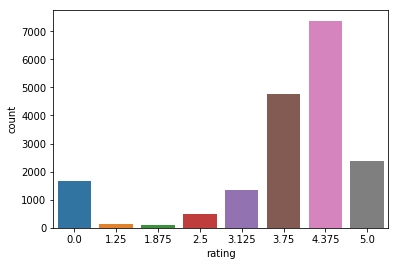

In [9]:
# rating plot
print(recipes_final.rating.value_counts())
sns.countplot(recipes_final["rating"])

# Preprocessing

In [10]:
import gensim
import nltk

data = recipes_final.ingredients.values.tolist()
print(data[:2])

[['4 cups low-sodium vegetable or chicken stock', '1 cup dried brown lentils', '1/2 cup dried French green lentils', '2 stalks celery, chopped', '1 large carrot, peeled and chopped', '1 sprig fresh thyme', '1 teaspoon kosher salt', '1 medium tomato, cored, seeded, and diced', '1 small Fuji apple, cored and diced', '1 tablespoon freshly squeezed lemon juice', '2 teaspoons extra-virgin olive oil', 'Freshly ground black pepper to taste', '3 sheets whole-wheat lavash, cut in half crosswise, or 6 (12-inch) flour tortillas', '3/4 pound turkey breast, thinly sliced', '1/2 head Bibb lettuce'], ['1 1/2 cups whipping cream', '2 medium onions, chopped', '5 teaspoons salt', '3 bay leaves', '3 whole cloves', '1 large garlic clove, crushed', '1 teaspoon pepper', '1/8 teaspoon ground nutmeg', 'Pinch of dried thyme, crumbled', '8 large shallots, minced', '1 tablespoon butter', '1 pound trimmed boneless center pork loin, sinew removed cut into 1-inch chunks, well chilled', '3 eggs', '6 tablespoon all p

In [11]:
# Tokenization
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:2])

[['cups', 'low', 'sodium', 'vegetable', 'or', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentils', 'cup', 'dried', 'french', 'green', 'lentils', 'stalks', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'and', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'and', 'diced', 'small', 'fuji', 'apple', 'cored', 'and', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoons', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'to', 'taste', 'sheets', 'whole', 'wheat', 'lavash', 'cut', 'in', 'half', 'crosswise', 'or', 'inch', 'flour', 'tortillas', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cups', 'whipping', 'cream', 'medium', 'onions', 'chopped', 'teaspoons', 'salt', 'bay', 'leaves', 'whole', 'cloves', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'of', 'dried', 'thyme', 'crumbled', 'large', 'sh

### Directly run LDA

In [12]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_words)
print(id2word)

# Create Corpus
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts] # convert doc to vector
print(corpus[:1])

Dictionary(6259 unique tokens: ['and', 'apple', 'bibb', 'black', 'breast']...)
[[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)]]


In [13]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=50)

# Specify how many topics we want to inspect and for each topic how many top words we want to include
topics = lda_model.show_topics(8, 15) 

for i in range(0, 8):
    pprint(topics[i])

(0,
 '0.043*"cup" + 0.041*"chopped" + 0.037*"tablespoons" + 0.034*"fresh" + '
 '0.034*"teaspoon" + 0.023*"oil" + 0.020*"pepper" + 0.019*"ground" + '
 '0.018*"olive" + 0.017*"salt" + 0.017*"tablespoon" + 0.015*"garlic" + '
 '0.015*"teaspoons" + 0.014*"finely" + 0.013*"or"')
(1,
 '0.076*"cup" + 0.048*"teaspoon" + 0.031*"cups" + 0.029*"tablespoons" + '
 '0.028*"sugar" + 0.022*"butter" + 0.021*"flour" + 0.020*"unsalted" + '
 '0.018*"all" + 0.018*"salt" + 0.018*"purpose" + 0.016*"teaspoons" + '
 '0.016*"ground" + 0.015*"large" + 0.012*"tablespoon"')
(2,
 '0.030*"fresh" + 0.030*"tablespoons" + 0.029*"sauce" + 0.027*"or" + '
 '0.024*"juice" + 0.023*"cup" + 0.022*"tablespoon" + 0.019*"lime" + '
 '0.019*"ginger" + 0.018*"ounce" + 0.017*"peeled" + 0.016*"soy" + '
 '0.016*"orange" + 0.015*"rice" + 0.013*"teaspoons"')
(3,
 '0.032*"into" + 0.031*"cup" + 0.029*"cut" + 0.026*"inch" + 0.022*"red" + '
 '0.022*"sliced" + 0.020*"oil" + 0.020*"cups" + 0.020*"tablespoons" + '
 '0.017*"about" + 0.016*"large

In [14]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.86495854310319

Coherence Score:  0.47962391703004315


In [15]:
# Visualize the topics
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:972: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1186: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:420: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=           x      y  topics  cluster   Freq
topic                                      
0      0.083  0.014       1        1 21.919
6      0.077  0.025       2        1 16.664
1     -0.182  0.035       3        1 15.530
3      0.122  0.020       4        1 14.625
4     -0.165 -0.031       5        1  9.598
7      0.081  0.041       6        1  7.495
5     -0.033  0.111       7        1  7.421
2      0.018 -0.215       8        1  6.747, topic_info=     Category      Freq         Term     Total  loglift  logprob
term                                                            
107   Default  7829.000        sugar  7829.000   30.000   30.000
12    Default 39595.000          cup 39595.000   29.000   29.000
167   Default  2656.000        sauce  2656.000   28.000   28.000
0     Default  9681.000          and  9681.000   27.000   27.000
82    Default  4423.000        cream  4423.000   26.000   26.000
29    Default  6542.000        juice  6542.000   25.000   25.000
18    Default  3654.000        flour  3654.000   24.000   24.000
20    Default 17618.000        fresh 17618.000   23.000   23.000
101   Default  3022.000      purpose  3022.000   22.000   22.000
68    Default  3160.000          all  3160.000   21.000   21.000
346   Default  2201.000         lime  2201.000   20.000   20.000
330   Default  2331.000      vanilla  2331.000   19.000   19.000
74    Default  6255.000       butter  6255.000   18.000   18.000
224   Default  1739.000       ginger  1739.000   17.000   17.000
40    Default 13490.000           or 13490.000   16.000   16.000
89    Default  8260.000         into  8260.000   15.000   15.000
131   Default  4790.000     unsalted  4790.000   14.000   14.000
42    Default  7055.000       pepper  7055.000   13.000   13.000
24    Default  7327.000       ground  7327.000   12.000   12.000
144   Default  2717.000       orange  2717.000   11.000   11.000
39    Default  6963.000        olive  6963.000   10.000   10.000
102   Default  5831.000          red  5831.000    9.000    9.000
14    Default  8000.000          cut  8000.000    8.000    8.000
8     Default  3491.000      chicken  3491.000    7.000    7.000
146   Default  5798.000        ounce  5798.000    6.000    6.000
41    Default  5592.000       peeled  5592.000    5.000    5.000
242   Default   979.000          soy   979.000    4.000    4.000
47    Default  6399.000       sliced  6399.000    3.000    3.000
403   Default  1358.000           at  1358.000    2.000    2.000
13    Default 16072.000         cups 16072.000    1.000    1.000
...       ...       ...          ...       ...      ...      ...
426    Topic8   259.817         tbsp   368.207    2.347   -5.421
236    Topic8   860.453         rice  1574.829    2.092   -4.223
346    Topic8  1124.303         lime  2201.463    2.024   -3.956
429    Topic8   288.339         fish   436.487    2.281   -5.317
780    Topic8   215.094       bottle   306.582    2.342   -5.610
325    Topic8   195.642       peanut   288.595    2.307   -5.705
144    Topic8   921.586       orange  2717.787    1.615   -4.155
707    Topic8   559.987          ice  1334.179    1.828   -4.653
29     Topic8  1411.934        juice  6542.424    1.163   -3.728
253    Topic8   599.172        cubes  1870.996    1.557   -4.585
146    Topic8  1066.733        ounce  5798.960    1.003   -4.009
41     Topic8   999.845       peeled  5592.510    0.975   -4.073
40     Topic8  1596.977           or 13490.248    0.562   -3.605
20     Topic8  1760.712        fresh 17618.328    0.393   -3.507
54     Topic8  1269.661   tablespoon 10725.898    0.562   -3.835
108    Topic8  1746.271  tablespoons 23478.510    0.097   -3.516
194    Topic8   745.154       ounces  7182.173    0.430   -4.367
12     Topic8  1374.280          cup 39595.125   -0.665   -3.755
57     Topic8   760.054    teaspoons  8845.771    0.242   -4.348
92     Topic8   561.713       minced  4753.802    0.560   -4.650
278    Topic8   386.291     cilantro  1652.942    1.242   -5.024
107    

### Lemmatization --> LDA

In [16]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_lemma = [[lemmatizer.lemmatize(w) for w in doc] for doc in data_words]
print(data_lemma[:2])

[['cup', 'low', 'sodium', 'vegetable', 'or', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'and', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'and', 'diced', 'small', 'fuji', 'apple', 'cored', 'and', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoon', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'to', 'taste', 'sheet', 'whole', 'wheat', 'lavash', 'cut', 'in', 'half', 'crosswise', 'or', 'inch', 'flour', 'tortilla', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cup', 'whipping', 'cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay', 'leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'of', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minc

In [17]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_lemma)
print(id2word)

# Create Corpus
texts = data_lemma
corpus = [id2word.doc2bow(text) for text in texts] # convert doc to vector
print(corpus[:1])

Dictionary(5654 unique tokens: ['and', 'apple', 'bibb', 'black', 'breast']...)
[[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 3), (13, 1), (14, 2), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)]]


In [18]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=50)

# Specify how many topics we want to inspect and for each topic how many top words we want to include
topics = lda_model.show_topics(8, 15) 

for i in range(0, 8):
    pprint(topics[i])

(0,
 '0.062*"tablespoon" + 0.056*"cup" + 0.039*"chopped" + 0.032*"fresh" + '
 '0.029*"teaspoon" + 0.023*"oil" + 0.017*"minced" + 0.015*"ounce" + '
 '0.015*"red" + 0.015*"garlic" + 0.014*"olive" + 0.014*"large" + 0.013*"pound" '
 '+ 0.013*"onion" + 0.012*"clove"')
(1,
 '0.033*"inch" + 0.033*"into" + 0.032*"cut" + 0.030*"cup" + 0.029*"and" + '
 '0.027*"tablespoon" + 0.023*"teaspoon" + 0.020*"fresh" + 0.019*"pound" + '
 '0.016*"piece" + 0.016*"or" + 0.015*"peeled" + 0.013*"to" + 0.012*"chopped" + '
 '0.012*"leaf"')
(2,
 '0.112*"cup" + 0.040*"teaspoon" + 0.040*"tablespoon" + 0.035*"sugar" + '
 '0.031*"cream" + 0.030*"ounce" + 0.020*"vanilla" + 0.020*"egg" + '
 '0.019*"large" + 0.015*"chopped" + 0.014*"butter" + 0.014*"or" + '
 '0.014*"extract" + 0.013*"unsalted" + 0.013*"chocolate"')
(3,
 '0.039*"or" + 0.037*"ounce" + 0.037*"cup" + 0.026*"and" + 0.022*"at" + '
 '0.017*"fresh" + 0.015*"to" + 0.015*"tablespoon" + 0.014*"available" + '
 '0.014*"juice" + 0.013*"for" + 0.013*"of" + 0.012*"food"

In [19]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemma, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.683696792715534

Coherence Score:  0.5013732011043277


In [20]:
# Visualize the topics
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=           x      y  topics  cluster   Freq
topic                                      
5     -0.094 -0.036       1        1 18.420
0     -0.138 -0.047       2        1 17.892
7     -0.096 -0.041       3        1 16.301
1     -0.145  0.001       4        1 15.464
4      0.130 -0.095       5        1 10.930
2      0.186 -0.048       6        1  9.470
6      0.153  0.043       7        1  5.829
3      0.005  0.222       8        1  5.695, topic_info=     Category      Freq        Term     Total  loglift  logprob
term                                                           
12    Default 56215.000         cup 56215.000   30.000   30.000
104   Default  8184.000       sugar  8184.000   29.000   29.000
140   Default 12716.000       ounce 12716.000   28.000   28.000
17    Default  3822.000       flour  3822.000   27.000   27.000
55    Default 30265.000    teaspoon 30265.000   26.000   26.000
66    Default  3310.000         all  3310.000   25.000   25.000
98    Default  3173.000     purpose  3173.000   24.000   24.000
138   Default  3097.000      orange  3097.000   23.000   23.000
28    Default  6704.000       juice  6704.000   22.000   22.000
79    Default  4460.000       cream  4460.000   21.000   21.000
86    Default  8334.000        into  8334.000   20.000   20.000
13    Default  8068.000         cut  8068.000   19.000   19.000
0     Default  9720.000         and  9720.000   18.000   18.000
72    Default  6364.000      butter  6364.000   17.000   17.000
126   Default  4921.000    unsalted  4921.000   16.000   16.000
39    Default 13318.000          or 13318.000   15.000   15.000
27    Default  8808.000        inch  8808.000   14.000   14.000
310   Default  2423.000     vanilla  2423.000   13.000   13.000
83    Default  4760.000         egg  4760.000   12.000   12.000
38    Default  7583.000       olive  7583.000   11.000   11.000
32    Default  5529.000       lemon  5529.000   10.000   10.000
53    Default 34229.000  tablespoon 34229.000    9.000    9.000
376   Default  1352.000          at  1352.000    8.000    8.000
41    Default  7686.000      pepper  7686.000    7.000    7.000
308   Default  3621.000       stick  3621.000    6.000    6.000
1     Default  1326.000       apple  1326.000    5.000    5.000
112   Default  1702.000      baking  1702.000    4.000    4.000
40    Default  5605.000      peeled  5605.000    3.000    3.000
9     Default 18457.000     chopped 18457.000    2.000    2.000
37    Default 10851.000         oil 10851.000    1.000    1.000
...       ...       ...         ...       ...      ...      ...
499    Topic8   174.438          is   195.561    2.751   -5.650
708    Topic8   112.668         are   122.381    2.783   -6.087
1084   Topic8   100.327      phyllo   107.814    2.793   -6.203
855    Topic8   107.873  maraschino   116.946    2.785   -6.131
498    Topic8   139.515  ingredient   156.562    2.750   -5.873
901    Topic8   151.066    vermouth   174.774    2.720   -5.794
942    Topic8    88.627          it    96.295    2.783   -6.327
544    Topic8   128.156        pink   156.104    2.668   -5.958
648    Topic8   518.158         ice  1327.066    1.925   -4.561
231    Topic8   441.626         the  1141.126    1.916   -4.721
45     Topic8   200.091       sheet   327.732    2.372   -5.513
39     Topic8  1911.544          or 13318.115    0.924   -3.256
140    Topic8  1842.959       ounce 12716.340    0.934   -3.292
238    Topic8   548.618        cube  1858.731    1.645   -4.504
0      Topic8  1287.398         and  9720.781    0.844   -3.651
272    Topic8   359.881          if  1111.453    1.738   -4.926
119    Topic8   643.093         for  3442.923    1.188   -4.345
91     Topic8   638.541          of  3676.342    1.115   -4.352
58     Topic8   746.805          to  5983.735    0.785   -4.196
12     Topic8  1811.163         cup 56215.555   -0.570   -3.310
28     Topic8   707.815       juice  6704.285    0.617   -4.249
19     Topic8   857.951       fresh 17491.725   -0.149   -4.0

### Lemmatization --> Standard English Stopwords --> LDA

In [21]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_lemma = [[lemmatizer.lemmatize(w) for w in doc] for doc in data_words]
print(data_lemma[:2])

[['cup', 'low', 'sodium', 'vegetable', 'or', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'and', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'and', 'diced', 'small', 'fuji', 'apple', 'cored', 'and', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoon', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'to', 'taste', 'sheet', 'whole', 'wheat', 'lavash', 'cut', 'in', 'half', 'crosswise', 'or', 'inch', 'flour', 'tortilla', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cup', 'whipping', 'cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay', 'leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'of', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minc

In [22]:
# Removal of stop words
stopwords = nltk.corpus.stopwords.words('english')
data_stop_lemma = [[w for w in doc if w not in stopwords] for doc in data_lemma]
print(data_stop_lemma[:2])

[['cup', 'low', 'sodium', 'vegetable', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'diced', 'small', 'fuji', 'apple', 'cored', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoon', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'taste', 'sheet', 'whole', 'wheat', 'lavash', 'cut', 'half', 'crosswise', 'inch', 'flour', 'tortilla', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cup', 'whipping', 'cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay', 'leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minced', 'tablespoon', 'butter', 'pound', 'trimmed', 'b

In [23]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_stop_lemma)
print(id2word)

# Create Corpus
texts = data_stop_lemma
corpus = [id2word.doc2bow(text) for text in texts] # convert doc to vector
print(corpus[:1])

Dictionary(5554 unique tokens: ['apple', 'bibb', 'black', 'breast', 'brown']...)
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 2), (10, 1), (11, 3), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1)]]


In [24]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=50)

# Specify how many topics we want to inspect and for each topic how many top words we want to include
topics = lda_model.show_topics(8, 15) 

for i in range(0, 8):
    pprint(topics[i])

(0,
 '0.120*"cup" + 0.059*"teaspoon" + 0.040*"tablespoon" + 0.037*"sugar" + '
 '0.020*"egg" + 0.018*"cream" + 0.018*"ounce" + 0.018*"large" + '
 '0.016*"vanilla" + 0.015*"salt" + 0.015*"butter" + 0.014*"unsalted" + '
 '0.013*"flour" + 0.012*"ground" + 0.010*"chopped"')
(1,
 '0.060*"cup" + 0.059*"tablespoon" + 0.049*"fresh" + 0.031*"chopped" + '
 '0.030*"teaspoon" + 0.025*"leaf" + 0.021*"oil" + 0.015*"juice" + '
 '0.015*"sliced" + 0.015*"pound" + 0.015*"olive" + 0.013*"red" + 0.013*"lemon" '
 '+ 0.012*"minced" + 0.012*"finely"')
(2,
 '0.071*"cup" + 0.065*"tablespoon" + 0.045*"butter" + 0.037*"teaspoon" + '
 '0.036*"unsalted" + 0.031*"cut" + 0.024*"stick" + 0.022*"fresh" + '
 '0.021*"flour" + 0.021*"inch" + 0.020*"salt" + 0.020*"purpose" + '
 '0.018*"large" + 0.017*"piece" + 0.017*"pound"')
(3,
 '0.054*"ounce" + 0.046*"cup" + 0.037*"tablespoon" + 0.023*"teaspoon" + '
 '0.020*"oil" + 0.020*"fresh" + 0.020*"cheese" + 0.020*"olive" + '
 '0.019*"sliced" + 0.017*"inch" + 0.016*"cut" + 0.013*"

In [25]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_stop_lemma, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.632529986712175

Coherence Score:  0.5261936281851626


In [26]:
# Visualize the topics
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=           x      y  topics  cluster   Freq
topic                                      
5      0.081 -0.064       1        1 22.167
0     -0.203  0.035       2        1 17.874
1      0.109 -0.043       3        1 15.638
3      0.054 -0.085       4        1 11.767
4      0.042 -0.047       5        1 11.330
2     -0.131 -0.021       6        1  8.719
7     -0.073  0.033       7        1  6.413
6      0.121  0.191       8        1  6.092, topic_info=     Category      Freq        Term     Total  loglift  logprob
term                                                           
67    Default  6492.000      butter  6492.000   30.000   30.000
11    Default 56008.000         cup 56008.000   29.000   29.000
118   Default  5002.000    unsalted  5002.000   28.000   28.000
131   Default 12505.000       ounce 12505.000   27.000   27.000
97    Default  7997.000       sugar  7997.000   26.000   26.000
149   Default  2757.000       sauce  2757.000   25.000   25.000
50    Default 34395.000  tablespoon 34395.000   24.000   24.000
7     Default  3545.000     chicken  3545.000   23.000   23.000
25    Default  8802.000        inch  8802.000   22.000   22.000
129   Default  3018.000      orange  3018.000   21.000   21.000
12    Default  8023.000         cut  8023.000   20.000   20.000
282   Default  3671.000       stick  3671.000   19.000   19.000
16    Default  3834.000       flour  3834.000   18.000   18.000
199   Default  1856.000          lb  1856.000   17.000   17.000
91    Default  3186.000     purpose  3186.000   16.000   16.000
18    Default 17626.000       fresh 17626.000   15.000   15.000
36    Default  7448.000       olive  7448.000   14.000   14.000
252   Default  1355.000          oz  1355.000   13.000   13.000
284   Default  2351.000     vanilla  2351.000   12.000   12.000
26    Default  6687.000       juice  6687.000   11.000   11.000
37    Default  5657.000      peeled  5657.000   10.000   10.000
74    Default  4436.000       cream  4436.000    9.000    9.000
142   Default  2830.000      cheese  2830.000    8.000    8.000
78    Default  4720.000         egg  4720.000    7.000    7.000
203   Default  1629.000        rice  1629.000    6.000    6.000
81    Default  5383.000        leaf  5383.000    5.000    5.000
66    Default  2269.000       broth  2269.000    4.000    4.000
35    Default 10840.000         oil 10840.000    3.000    3.000
209   Default  1030.000         soy  1030.000    2.000    2.000
350   Default   901.000   available   901.000    1.000    1.000
...       ...       ...         ...       ...      ...      ...
474    Topic8   411.558       store   510.580    2.583   -4.760
207    Topic8   540.718      sesame   699.190    2.541   -4.487
639    Topic8   170.385     section   198.162    2.647   -5.641
262    Topic8   297.579        thai   371.613    2.576   -5.084
149    Topic8  1577.085       sauce  2757.606    2.239   -3.416
203    Topic8   965.658        rice  1629.656    2.275   -3.907
187    Topic8   206.812         see   287.579    2.468   -5.448
196    Topic8   759.100      ginger  1802.430    1.933   -4.147
279    Topic8   284.438      peanut   500.204    2.234   -5.129
249    Topic8   113.355  lemongrass   135.057    2.623   -6.049
239    Topic8   313.821     coconut   796.420    1.867   -5.031
37     Topic8   936.788      peeled  5657.583    1.000   -3.937
50     Topic8  2244.138  tablespoon 34395.051    0.069   -3.063
133    Topic8   316.817       paste   843.975    1.818   -5.021
52     Topic8  1248.318    teaspoon 30037.555   -0.382   -3.650
35     Topic8   760.507         oil 10840.671    0.141   -4.146
11     Topic8  1354.108         cup 56008.039   -0.924   -3.569
58     Topic8   456.115   vegetable  3255.021    0.833   -4.657
39     Topic8   624.507       pound  9929.780    0.032   -4.343
21     Topic8   404.698       green  3149.104    0.747   -4.776
172    Topic8   273.382         pea   775.182    1.756   -5.169
43     Topic8   473.313      sliced  6249.321    0.218   -4.6

### Lemmatization --> Standard English Stopwords --> Trigram --> LDA

In [27]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_lemma = [[lemmatizer.lemmatize(w) for w in doc] for doc in data_words]
print(data_lemma[:2])

[['cup', 'low', 'sodium', 'vegetable', 'or', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'and', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'and', 'diced', 'small', 'fuji', 'apple', 'cored', 'and', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoon', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'to', 'taste', 'sheet', 'whole', 'wheat', 'lavash', 'cut', 'in', 'half', 'crosswise', 'or', 'inch', 'flour', 'tortilla', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cup', 'whipping', 'cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay', 'leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'of', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minc

In [28]:
# Removal of stop words
stopwords = nltk.corpus.stopwords.words('english')
data_stop_lemma = [[w for w in doc if w not in stopwords] for doc in data_lemma]
print(data_stop_lemma[:2])

[['cup', 'low', 'sodium', 'vegetable', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'diced', 'small', 'fuji', 'apple', 'cored', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoon', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'taste', 'sheet', 'whole', 'wheat', 'lavash', 'cut', 'half', 'crosswise', 'inch', 'flour', 'tortilla', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cup', 'whipping', 'cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay', 'leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minced', 'tablespoon', 'butter', 'pound', 'trimmed', 'b

In [29]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_stop_lemma, min_count=5, threshold=15) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_stop_lemma], threshold=15)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_stop_lemma[0]]])
print(trigram_mod[bigram_mod[data_stop_lemma[1]]])

['cup', 'low_sodium', 'vegetable', 'chicken_stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk_celery', 'chopped', 'large', 'carrot', 'peeled', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'diced', 'small', 'fuji_apple', 'cored', 'diced', 'tablespoon', 'freshly_squeezed', 'lemon', 'juice', 'teaspoon', 'extra_virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'taste', 'sheet', 'whole_wheat', 'lavash', 'cut', 'half', 'crosswise', 'inch', 'flour_tortilla', 'pound', 'turkey_breast', 'thinly', 'sliced', 'head_bibb_lettuce']
['cup', 'whipping_cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay_leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minced', 'tablespoon', 'butter', 'pound', 'trimmed', 'boneless', 'center', 'pork_loin', 'sinew',

In [30]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(data_stop_lemma)

# Form Trigrams
data_words_trigrams = make_trigrams(data_stop_lemma)

print(data_words_trigrams[:2])

[['cup', 'low_sodium', 'vegetable', 'chicken_stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk_celery', 'chopped', 'large', 'carrot', 'peeled', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'diced', 'small', 'fuji_apple', 'cored', 'diced', 'tablespoon', 'freshly_squeezed', 'lemon', 'juice', 'teaspoon', 'extra_virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'taste', 'sheet', 'whole_wheat', 'lavash', 'cut', 'half', 'crosswise', 'inch', 'flour_tortilla', 'pound', 'turkey_breast', 'thinly', 'sliced', 'head_bibb_lettuce'], ['cup', 'whipping_cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay_leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minced', 'tablespoon', 'butter', 'pound', 'trimmed', 'boneless', 'center', 'pork_loin', 'sinew

In [31]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_words_trigrams)
print(id2word)

# Create Corpus
texts = data_words_trigrams
corpus = [id2word.doc2bow(text) for text in texts] # convert doc to vector
print(corpus[:1])

Dictionary(7816 unique tokens: ['black', 'brown', 'carrot', 'chicken_stock', 'chopped']...)
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 3), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1)]]


In [32]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=50)

# Specify how many topics we want to inspect and for each topic how many top words we want to include
topics = lda_model.show_topics(8, 15) 

for i in range(0, 8):
    pprint(topics[i])

(0,
 '0.122*"cup" + 0.050*"juice" + 0.044*"fresh" + 0.036*"ounce" + 0.023*"sugar" '
 '+ 0.018*"peeled" + 0.018*"lemon" + 0.017*"water" + 0.016*"lime" + '
 '0.014*"frozen" + 0.014*"pineapple" + 0.013*"mint" + 0.012*"tablespoon" + '
 '0.012*"cranberry" + 0.011*"tsp"')
(1,
 '0.060*"tablespoon" + 0.057*"cup" + 0.039*"chopped" + 0.033*"fresh" + '
 '0.033*"teaspoon" + 0.030*"oil" + 0.029*"olive" + 0.023*"ounce" + '
 '0.019*"pepper" + 0.018*"garlic" + 0.018*"pound" + 0.016*"salt" + 0.016*"red" '
 '+ 0.015*"clove" + 0.014*"large"')
(2,
 '0.104*"cup" + 0.070*"teaspoon" + 0.055*"tablespoon" + 0.048*"chopped" + '
 '0.027*"ounce" + 0.020*"finely" + 0.019*"salt" + 0.017*"fresh" + '
 '0.016*"ground" + 0.013*"large" + 0.012*"butter" + 0.012*"pepper" + '
 '0.011*"oil" + 0.010*"grated" + 0.009*"onion"')
(3,
 '0.078*"cup" + 0.077*"teaspoon" + 0.039*"tablespoon" + 0.034*"ground" + '
 '0.033*"salt" + 0.031*"fresh" + 0.018*"chopped" + 0.016*"pepper" + '
 '0.015*"black" + 0.015*"pound" + 0.015*"large" + 0.0

In [33]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.685328879922382

Coherence Score:  0.48432996350970037


In [34]:
# Visualize the topics
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=           x      y  topics  cluster   Freq
topic                                      
1      0.056  0.078       1        1 30.677
7     -0.190  0.012       2        1 17.165
2     -0.061  0.099       3        1 14.027
3     -0.023  0.090       4        1 11.231
6      0.039  0.032       5        1  8.672
5      0.091  0.010       6        1  7.304
4      0.242 -0.115       7        1  6.819
0     -0.154 -0.207       8        1  4.105, topic_info=     Category      Freq         Term     Total  loglift  logprob
term                                                            
7     Default 55479.000          cup 55479.000   30.000   30.000
22    Default  9354.000         inch  9354.000   29.000   29.000
8     Default  8583.000          cut  8583.000   28.000   28.000
45    Default 29351.000     teaspoon 29351.000   27.000   27.000
23    Default  6792.000        juice  6792.000   26.000   26.000
84    Default  8029.000        sugar  8029.000   25.000   25.000
39    Default  6462.000       sliced  6462.000   24.000   24.000
150   Default  4424.000        piece  4424.000   23.000   23.000
14    Default 17618.000        fresh 17618.000   22.000   22.000
33    Default  5948.000       peeled  5948.000   21.000   21.000
46    Default  3790.000       thinly  3790.000   20.000   20.000
35    Default 10113.000        pound 10113.000   19.000   19.000
114   Default 12675.000        ounce 12675.000   18.000   18.000
4     Default 18018.000      chopped 18018.000   17.000   17.000
43    Default 33670.000   tablespoon 33670.000   16.000   16.000
19    Default  7237.000       ground  7237.000   15.000   15.000
71    Default  4775.000       minced  4775.000   14.000   14.000
31    Default 10736.000          oil 10736.000   13.000   13.000
79    Default  5704.000          red  5704.000   12.000   12.000
119   Default  2419.000        thick  2419.000   11.000   11.000
27    Default  5480.000        lemon  5480.000   10.000   10.000
112   Default  2525.000       orange  2525.000    9.000    9.000
30    Default  3684.000       medium  3684.000    8.000    8.000
83    Default  2641.000        slice  2641.000    7.000    7.000
272   Default  2290.000         lime  2290.000    6.000    6.000
101   Default  4830.000     unsalted  4830.000    5.000    5.000
32    Default  7389.000        olive  7389.000    4.000    4.000
54    Default  6248.000       butter  6248.000    3.000    3.000
191   Default  1468.000         cube  1468.000    2.000    2.000
73    Default  5710.000        onion  5710.000    1.000    1.000
...       ...       ...          ...       ...      ...      ...
773    Topic8   210.040         ripe   351.144    2.679   -4.889
500    Topic8   119.793   grapefruit   190.153    2.731   -5.451
241    Topic8   113.839          bag   186.716    2.698   -5.502
23     Topic8  1399.602        juice  6792.562    1.613   -2.992
449    Topic8   184.100  unsweetened   376.556    2.477   -5.021
125    Topic8   395.801       frozen  1155.442    2.122   -4.255
273    Topic8   366.277         mint  1158.913    2.041   -4.333
473    Topic8   206.204        apple   487.160    2.333   -4.907
601    Topic8   145.559   strawberry   289.665    2.505   -5.256
554    Topic8   172.657         pint   388.441    2.382   -5.085
7      Topic8  3413.055          cup 55479.801    0.405   -2.101
117    Topic8   301.651       pitted   991.555    2.003   -4.527
272    Topic8   458.289         lime  2290.140    1.584   -4.109
5      Topic8   266.686        cored   910.787    1.965   -4.650
637    Topic8   181.682    raspberry   475.173    2.231   -5.034
14     Topic8  1227.799        fresh 17618.828    0.529   -3.123
114    Topic8  1002.691        ounce 12675.516    0.656   -3.326
165    Topic8   479.855        water  4259.026    1.010   -4.063
84     Topic8   632.513        sugar  8029.224    0.652   -3.787
27     Topic8   492.841        lemon  5480.374    0.784   -4.036
33     Topic8   502.984       peeled  5948.150    0.723   -4.016
9      

### Lemmatization --> Stopwords --> Additional Stopwords --> Trigram --> LDA

In [35]:
# lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data_lemma = [[lemmatizer.lemmatize(w) for w in doc] for doc in data_words]
print(data_lemma[:2])

[['cup', 'low', 'sodium', 'vegetable', 'or', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'and', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'and', 'diced', 'small', 'fuji', 'apple', 'cored', 'and', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoon', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'to', 'taste', 'sheet', 'whole', 'wheat', 'lavash', 'cut', 'in', 'half', 'crosswise', 'or', 'inch', 'flour', 'tortilla', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cup', 'whipping', 'cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay', 'leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'of', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minc

In [36]:
# Removal of stop words
stopwords = nltk.corpus.stopwords.words('english')
data_stop_lemma = [[w for w in doc if w not in stopwords] for doc in data_lemma]
print(data_stop_lemma[:2])

[['cup', 'low', 'sodium', 'vegetable', 'chicken', 'stock', 'cup', 'dried', 'brown', 'lentil', 'cup', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'chopped', 'large', 'carrot', 'peeled', 'chopped', 'sprig', 'fresh', 'thyme', 'teaspoon', 'kosher', 'salt', 'medium', 'tomato', 'cored', 'seeded', 'diced', 'small', 'fuji', 'apple', 'cored', 'diced', 'tablespoon', 'freshly', 'squeezed', 'lemon', 'juice', 'teaspoon', 'extra', 'virgin', 'olive', 'oil', 'freshly', 'ground', 'black', 'pepper', 'taste', 'sheet', 'whole', 'wheat', 'lavash', 'cut', 'half', 'crosswise', 'inch', 'flour', 'tortilla', 'pound', 'turkey', 'breast', 'thinly', 'sliced', 'head', 'bibb', 'lettuce'], ['cup', 'whipping', 'cream', 'medium', 'onion', 'chopped', 'teaspoon', 'salt', 'bay', 'leaf', 'whole', 'clove', 'large', 'garlic', 'clove', 'crushed', 'teaspoon', 'pepper', 'teaspoon', 'ground', 'nutmeg', 'pinch', 'dried', 'thyme', 'crumbled', 'large', 'shallot', 'minced', 'tablespoon', 'butter', 'pound', 'trimmed', 'b

In [37]:
# Removal of stop words
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['cup', 'tablespoon', 'teaspoon', 'chopped', 'fresh', 'ounce', 'salt', 'large', 'pound', 'inch', 'cut',
                'ground',  'sliced', 'finely', 'peeled', 'grated', 'unsalted', 'water', 'piece', 'stick', 'plus', 
                'freshly', 'medium', 'thinly', 'whole', 'small', 'dry', 'packed', 'slice', 'coarsely', 'halved', 
                'divided', 'parsley',  'thick', 'trimmed', 'drained', 'diced', 'lb',  'lengthwise', 'taste', 'toasted', 
                'cube', 'seeded', 'low', 'frozen', 'half', 'temperature', 'room', 'chilled', 'oz', 'heavy', 'canned', 
                'crumbled', 'peel', 'chile', 'crushed', 'coarse', 'optional', 'pitted', 'preferably', 'package', 
                'garnish', 'quartered', 'crosswise', 'ice', 'strip', 'thin', 'hot', 'equipment', 'fine', 'bunch', 
                'sea', 'removed', 'light',  'special', 'dijon', 'rinsed', 'flat', 'rib', 'boneless', 'melted', 
                'head', 'pinch', 'dark', 'cored', 'fat', 'golden','paste', 'cooked', 'well', 'ripe', 'accompaniment', 
                'lightly',  'fennel', 'softened', 'available', 'mayonnaise','sugar','kosher','cold','long','minced', 
                # after checking through the topics (numbers 1-4 results)
                'nonstick', 'spray','quart', 'serving', 'xa', 'wedge', 'part', 'torn', 'bulb', 'wide', 'stemmed', 
                'shredded', 'desired', 'round', 'total', 'unpeeled', 'beaten', 'dice', 'granulated', 'two', 
                'one', 'cooled', 'kitchen', 'string', 'raw', 'unsweetened', 'sheet', 'chunk', 'thawed', 'brown', 
                'warm', 'regular', 'roasted', 'tbsp', 'patted', 'firmly', 'pan', 'additional', 'pure', 'separated', 'size', 
                # add these words to get number 5 results
                'superfine', 'frying', 'pale', 'purpose', 'split', 'tsp', 'bone', 'stem'
                # add these words to get number 6 results
                # 'purchased', 'reserved', 'diameter', 'sweet', 'roughly'
               ]

stopwords.extend(newStopWords)
data_addstop_lemma = [[w for w in doc if w not in stopwords] for doc in data_stop_lemma]
print(data_addstop_lemma[:2])

[['sodium', 'vegetable', 'chicken', 'stock', 'dried', 'lentil', 'dried', 'french', 'green', 'lentil', 'stalk', 'celery', 'carrot', 'sprig', 'thyme', 'tomato', 'fuji', 'apple', 'squeezed', 'lemon', 'juice', 'extra', 'virgin', 'olive', 'oil', 'black', 'pepper', 'wheat', 'lavash', 'flour', 'tortilla', 'turkey', 'breast', 'bibb', 'lettuce'], ['whipping', 'cream', 'onion', 'bay', 'leaf', 'clove', 'garlic', 'clove', 'pepper', 'nutmeg', 'dried', 'thyme', 'shallot', 'butter', 'center', 'pork', 'loin', 'sinew', 'egg', 'flour', 'tawny', 'port', 'dried', 'currant', 'lettuce', 'leaf', 'cracked', 'peppercorn', 'bay', 'leaf', 'french', 'bread', 'baguette', 'olive', 'oil', 'red', 'onion', 'dried', 'currant', 'red', 'wine', 'vinegar', 'chicken', 'broth', 'thyme', 'dried']]


In [38]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_addstop_lemma, min_count=5, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_addstop_lemma], threshold=5)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_addstop_lemma[0]]])
print(trigram_mod[bigram_mod[data_addstop_lemma[1]]])

['sodium_vegetable', 'chicken_stock', 'dried', 'lentil', 'dried', 'french_green_lentil', 'stalk_celery_carrot', 'sprig_thyme', 'tomato', 'fuji_apple', 'squeezed_lemon_juice', 'extra_virgin_olive_oil', 'black_pepper', 'wheat', 'lavash', 'flour_tortilla', 'turkey_breast', 'bibb_lettuce']
['whipping_cream', 'onion', 'bay_leaf', 'clove', 'garlic_clove', 'pepper', 'nutmeg', 'dried_thyme', 'shallot', 'butter', 'center_pork_loin', 'sinew', 'egg', 'flour', 'tawny_port', 'dried_currant', 'lettuce_leaf', 'cracked', 'peppercorn', 'bay_leaf', 'french_bread_baguette', 'olive_oil', 'red_onion', 'dried_currant', 'red_wine_vinegar', 'chicken_broth', 'thyme', 'dried']


In [39]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Form Bigrams
data_words_bigrams = make_bigrams(data_addstop_lemma)

# Form Trigrams
data_words_trigrams = make_trigrams(data_addstop_lemma)

print(data_words_trigrams[:2])

[['sodium_vegetable', 'chicken_stock', 'dried', 'lentil', 'dried', 'french_green_lentil', 'stalk_celery_carrot', 'sprig_thyme', 'tomato', 'fuji_apple', 'squeezed_lemon_juice', 'extra_virgin_olive_oil', 'black_pepper', 'wheat', 'lavash', 'flour_tortilla', 'turkey_breast', 'bibb_lettuce'], ['whipping_cream', 'onion', 'bay_leaf', 'clove', 'garlic_clove', 'pepper', 'nutmeg', 'dried_thyme', 'shallot', 'butter', 'center_pork_loin', 'sinew', 'egg', 'flour', 'tawny_port', 'dried_currant', 'lettuce_leaf', 'cracked', 'peppercorn', 'bay_leaf', 'french_bread_baguette', 'olive_oil', 'red_onion', 'dried_currant', 'red_wine_vinegar', 'chicken_broth', 'thyme', 'dried']]


In [40]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_words_trigrams)
print(id2word)

Dictionary(8579 unique tokens: ['bibb_lettuce', 'black_pepper', 'chicken_stock', 'dried', 'extra_virgin_olive_oil']...)


In [41]:
# Create Corpus
texts = data_words_trigrams
corpus = [id2word.doc2bow(text) for text in texts] # convert doc to vector
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]]


In [42]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=50)

# Specify how many topics we want to inspect and for each topic how many top words we want to include
topics = lda_model.show_topics(8, 15) 

for i in range(0, 8):
    pprint(topics[i])

(0,
 '0.015*"ginger" + 0.011*"leaf" + 0.009*"herb" + 0.008*"black_pepper" + '
 '0.008*"coconut_milk" + 0.008*"specialty_food_store" + 0.007*"lemon_juice" + '
 '0.007*"kaffir_lime_leaf" + 0.007*"shallot" + 0.006*"beer" + 0.006*"lemon" + '
 '0.006*"club_soda" + 0.006*"curry" + 0.006*"red" + 0.006*"green"')
(1,
 '0.044*"butter" + 0.017*"flour" + 0.017*"orange" + 0.016*"olive_oil" + '
 '0.014*"chicken_broth" + 0.014*"onion" + 0.010*"dried" + 0.010*"honey" + '
 '0.009*"pepper" + 0.009*"lemon_juice" + 0.009*"whipping_cream" + 0.008*"leaf" '
 '+ 0.008*"mustard" + 0.008*"shallot" + 0.008*"orange_juice"')
(2,
 '0.029*"lemon_juice" + 0.026*"lemon" + 0.025*"olive_oil" + '
 '0.019*"black_pepper" + 0.017*"extra_virgin_olive_oil" + 0.014*"lime_juice" + '
 '0.013*"red_onion" + 0.012*"orange" + 0.012*"green" + 0.011*"cilantro" + '
 '0.011*"mint_leaf" + 0.010*"red" + 0.010*"cucumber" + 0.010*"mint" + '
 '0.010*"dill"')
(3,
 '0.028*"black_pepper" + 0.020*"vegetable_oil" + 0.019*"onion" + '
 '0.017*"butt

In [43]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.441431720274272

Coherence Score:  0.37059792575992107


In [44]:
# Visualize the topics
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=           x      y  topics  cluster   Freq
topic                                      
5     -0.151  0.117       1        1 24.100
6      0.342 -0.011       2        1 15.892
3     -0.020  0.014       3        1 12.436
7     -0.112 -0.001       4        1 10.919
4      0.037  0.053       5        1 10.413
2     -0.090  0.045       6        1 10.254
1      0.061  0.074       7        1 10.222
0     -0.066 -0.291       8        1  5.766, topic_info=     Category     Freq                    Term    Total  loglift  logprob
term                                                                     
18    Default 5892.000                  butter 5892.000   30.000   30.000
25    Default 2787.000                     egg 2787.000   29.000   29.000
157   Default 1094.000         vanilla_extract 1094.000   28.000   28.000
45    Default 1583.000                    milk 1583.000   27.000   27.000
26    Default 2290.000                   flour 2290.000   26.000   26.000
31    Default 4707.000               olive_oil 4707.000   25.000   25.000
28    Default 3920.000            garlic_clove 3920.000   24.000   24.000
335   Default 1423.000                   cream 1423.000   23.000   23.000
4     Default 1973.000  extra_virgin_olive_oil 1973.000   22.000   22.000
336   Default  821.000                egg_yolk  821.000   21.000   21.000
56    Default 1071.000                  orange 1071.000   20.000   20.000
41    Default 1090.000          whipping_cream 1090.000   19.000   19.000
20    Default 1214.000           chicken_broth 1214.000   18.000   18.000
32    Default 3913.000                   onion 3913.000   17.000   17.000
261   Default  996.000                cinnamon  996.000   16.000   16.000
94    Default  718.000                scallion  718.000   15.000   15.000
177   Default  591.000               soy_sauce  591.000   14.000   14.000
281   Default 1757.000                   lemon 1757.000   13.000   13.000
35    Default 1131.000               red_onion 1131.000   12.000   12.000
1     Default 2919.000            black_pepper 2919.000   11.000   11.000
99    Default 2284.000           vegetable_oil 2284.000   10.000   10.000
172   Default 1176.000              lime_juice 1176.000    9.000    9.000
87    Default 1643.000                   green 1643.000    8.000    8.000
86    Default 1482.000                  ginger 1482.000    7.000    7.000
169   Default 1399.000                cilantro 1399.000    6.000    6.000
273   Default 2660.000             lemon_juice 2660.000    5.000    5.000
499   Default  344.000                 vanilla  344.000    4.000    4.000
14    Default 1488.000                  tomato 1488.000    3.000    3.000
533   Default  409.000            cream_cheese  409.000    2.000    2.000
33    Default 1945.000                  pepper 1945.000    1.000    1.000
...       ...      ...                     ...      ...      ...      ...
1754   Topic8   38.397              sprig_mint   40.108    2.810   -5.818
1805   Topic8   60.748             dried_fruit   65.457    2.779   -5.360
2619   Topic8   37.922                    chop   39.688    2.808   -5.831
1136   Topic8   65.483                thai_red   71.023    2.772   -5.285
2304   Topic8   32.361        many_supermarket   33.745    2.811   -5.989
736    Topic8   66.006               ruby_port   75.179    2.723   -5.277
1134   Topic8   72.566                   curry   86.996    2.672   -5.182
5134   Topic8   43.709                  squash   48.158    2.756   -5.689
2237   Topic8   67.562                  double   81.162    2.670   -5.253
691    Topic8   77.377                    beer  100.862    2.588   -5.118
960    Topic8   69.217       dried_tart_cherry   92.979    2.558   -5.229
767    Topic8   75.510               club_soda  110.587    2.472   -5.142
127    Topic8   98.875            coconut_milk  221.184    2.048   -4.872
1198   Topic8   70.885                   vodka  146.996    2.124   -5.205
86     Topic8  192.197                 

### Lemmatization --> Stopwords --> Additional Stopwords --> Trigram --> Filter terms in dictionary --> LDA

In [45]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_words_trigrams)

# Filter terms which occurs in less than 150 recipes & more than 60% of the articles 
id2word.filter_extremes(no_below=150, no_above=0.6)
 
print(id2word)

Dictionary(193 unique tokens: ['black_pepper', 'dried', 'extra_virgin_olive_oil', 'tomato', 'bay_leaf']...)


In [46]:
# Create Corpus
texts = data_words_trigrams
corpus = [id2word.doc2bow(text) for text in texts] # convert doc to vector
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1)]]


In [47]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=50)

# Specify how many topics we want to inspect and for each topic how many top words we want to include
topics = lda_model.show_topics(8, 15) 

for i in range(0, 8):
    pprint(topics[i])

(0,
 '0.081*"vegetable_oil" + 0.075*"ginger" + 0.062*"soy_sauce" + 0.059*"pepper" '
 '+ 0.054*"garlic_clove" + 0.045*"scallion" + 0.043*"sauce" + 0.037*"green" + '
 '0.028*"honey" + 0.025*"onion" + 0.023*"dried_red" + 0.022*"mixed" + '
 '0.020*"cornstarch" + 0.020*"peanut" + 0.018*"sherry"')
(1,
 '0.103*"butter" + 0.061*"onion" + 0.052*"chicken_broth" + 0.044*"flour" + '
 '0.030*"white_wine" + 0.029*"thyme" + 0.026*"bay_leaf" + 0.024*"black_pepper" '
 '+ 0.024*"shallot" + 0.023*"dried" + 0.022*"garlic_clove" + '
 '0.020*"whipping_cream" + 0.020*"dried_thyme" + 0.020*"sage" + 0.019*"carrot"')
(2,
 '0.089*"onion" + 0.068*"cilantro" + 0.054*"green" + 0.043*"garlic_clove" + '
 '0.041*"white" + 0.041*"leaf" + 0.029*"ginger" + 0.029*"olive_oil" + '
 '0.028*"vegetable_oil" + 0.024*"lime_juice" + 0.020*"black_pepper" + '
 '0.019*"lime" + 0.017*"pepper" + 0.017*"tomato" + 0.016*"curry_powder"')
(3,
 '0.080*"lime_juice" + 0.053*"juice" + 0.052*"orange" + 0.052*"red_onion" + '
 '0.048*"orange_jui

In [48]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.8106286114314925

Coherence Score:  0.4831088206293682


In [49]:
# Visualize the topics
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=           x      y  topics  cluster   Freq
topic                                      
5     -0.370  0.011       1        1 19.950
7      0.145 -0.103       2        1 14.347
1     -0.078 -0.170       3        1 13.612
2      0.110  0.063       4        1 13.333
4      0.145 -0.111       5        1 12.360
6     -0.047 -0.048       6        1 10.337
0      0.078  0.111       7        1  8.670
3      0.016  0.248       8        1  7.391, topic_info=     Category     Freq                    Term    Total  loglift  logprob
term                                                                     
13    Default 4519.000               olive_oil 4519.000   30.000   30.000
5     Default 5884.000                  butter 5884.000   29.000   29.000
67    Default 1419.000                cilantro 1419.000   28.000   28.000
38    Default 1542.000                  ginger 1542.000   27.000   27.000
68    Default 1231.000              lime_juice 1231.000   26.000   26.000
2     Default 2056.000  extra_virgin_olive_oil 2056.000   25.000   25.000
11    Default 3943.000            garlic_clove 3943.000   24.000   24.000
60    Default 1040.000         vanilla_extract 1040.000   23.000   23.000
14    Default 3989.000                   onion 3989.000   22.000   22.000
64    Default  750.000                   chive  750.000   21.000   21.000
44    Default 2402.000           vegetable_oil 2402.000   20.000   20.000
70    Default  648.000               soy_sauce  648.000   19.000   19.000
10    Default 2272.000                   flour 2272.000   18.000   18.000
48    Default 1166.000                 mustard 1166.000   17.000   17.000
0     Default 3041.000            black_pepper 3041.000   16.000   16.000
23    Default 1542.000                    milk 1542.000   15.000   15.000
9     Default 2714.000                     egg 2714.000   14.000   14.000
15    Default 1974.000                  pepper 1974.000   13.000   13.000
28    Default 1078.000                  orange 1078.000   12.000   12.000
39    Default 1679.000                   green 1679.000   11.000   11.000
91    Default 2691.000             lemon_juice 2691.000   10.000   10.000
27    Default  620.000                   juice  620.000    9.000    9.000
42    Default  776.000                scallion  776.000    8.000    8.000
6     Default 1265.000           chicken_broth 1265.000    7.000    7.000
16    Default 1152.000               red_onion 1152.000    6.000    6.000
104   Default  787.000                egg_yolk  787.000    5.000    5.000
82    Default  705.000            orange_juice  705.000    4.000    4.000
154   Default  564.000                   sauce  564.000    3.000    3.000
3     Default 1478.000                  tomato 1478.000    2.000    2.000
103   Default 1405.000                   cream 1405.000    1.000    1.000
...       ...      ...                     ...      ...      ...      ...
149    Topic8  134.390            plain_yogurt  270.806    1.904   -4.173
98     Topic8  257.455                   cumin  538.714    1.867   -3.523
175    Topic8   80.153                diameter  171.264    1.846   -4.689
28     Topic8  455.240                  orange 1078.281    1.743   -2.953
16     Topic8  451.994               red_onion 1152.287    1.669   -2.960
119    Topic8  196.100                    lime  508.516    1.652   -3.795
41     Topic8  112.033                    rice  342.550    1.487   -4.354
69     Topic8  153.428                    mint  504.412    1.415   -4.040
50     Topic8  162.241      white_wine_vinegar  578.181    1.334   -3.984
159    Topic8   85.167                    beef  316.172    1.293   -4.629
89     Topic8   55.215              green_bean  216.220    1.240   -5.062
187    Topic8   38.924              mint_sprig  154.216    1.228   -5.412
42     Topic8  193.029                scallion  776.393    1.213   -3.810
67     Topic8  336.104                cilantro 1419.648    1.164   -3.256
57     Topic8  221.039                 